# The battle of neighbourhood

* [Introduction](#introduction)
* [Data Preparation and Exploratory Analysis](#data)
* [Modeling](#modeling)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


## Introduction: <a name="introduction"></a>
The goal of this project is to choose right location when opening a Chinese restaurant in Toronto. Restaurant industry is one of the most competitive businesses in the world. When opening new restaurant in a big city like Toronto, not only planning  for the budget, menu and operation are important for the business, but also picking up right location is very crucial to ensure thriving guest visit and bypass competitiveness among restaurants in the future. 
The success of a restaurant is usually be influenced by a variety of social factors.  Toronto is the capital of Ontario in Canada. Being a Centre of finance, arts and culture, it is recognized as one of the most international, multicultural and dynamic cities in the world. Therefore analyzing the demographic, social and economic characteristics as well as restaurant categories and distribution in each City of Toronto neighborhood will bring insights to understand the patterns and factors that associated with restaurant location, which eventually can be used as guidance for new restaurants to choose right location to fit their business model.  


## Data Preparation and Exploratory Analysis: <a name="data"></a>
Neighborhood profile data such as demographic, income, economic and geo data would be downloaded from Toronto open data website (https://www.toronto.ca/city-government/data-research-maps/open-data/). Restaurant category and location data of each neighborhood would be queried from Foursquare API.  Data will be then cleaned, transformed, aggregated and integrated together for developing analytic model that can reveal the patterns and insights for choosing right neighborhood for Chinese restaurant.  

In [2]:
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json
import requests 
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from IPython.display import Image 
from IPython.core.display import HTML 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import wget
#import k-means from clustering stage
from sklearn.cluster import KMeans
from bs4 import BeautifulSoup as BS
import folium
from folium.plugins import MarkerCluster

print('Libraries imported.')

Libraries imported.


### City of Toronto neighbourhood demographic, population, economic, and geo data from Toronto open data source

#### 1. City of Toronto neighourhood profile data 

In [3]:
Toronto_neibourhood_profile=pd.read_csv(r'D:\Yafen\study\IBM data science course on Coursera\Capstone\neighbourhood-profiles-2016-csv.csv')

print('Toronto_neibourhood_profile data shape',Toronto_neibourhood_profile.shape)
Toronto_neibourhood_profile.columns.values

Toronto_neibourhood_profile data shape (2383, 147)


array(['_id', 'Category', 'Topic', 'Characteristic', 'City of Toronto',
       'Agincourt North', 'Agincourt South-Malvern West', 'Alderwood',
       'Annex', 'Banbury-Don Mills', 'Bathurst Manor',
       'Bay Street Corridor', 'Bayview Village', 'Bayview Woods-Steeles',
       'Bedford Park-Nortown', 'Beechborough-Greenbrook', 'Bendale',
       'Birchcliffe-Cliffside', 'Black Creek', 'Blake-Jones',
       'Briar Hill-Belgravia', 'Bridle Path-Sunnybrook-York Mills',
       'Broadview North', 'Brookhaven-Amesbury',
       'Cabbagetown-South St. James Town', 'Caledonia-Fairbank',
       'Casa Loma', 'Centennial Scarborough', 'Church-Yonge Corridor',
       'Clairlea-Birchmount', 'Clanton Park', 'Cliffcrest',
       'Corso Italia-Davenport', 'Danforth', 'Danforth East York',
       'Don Valley Village', 'Dorset Park',
       'Dovercourt-Wallace Emerson-Junction', 'Downsview-Roding-CFB',
       'Dufferin Grove', 'East End-Danforth', 'Edenbridge-Humber Valley',
       'Eglinton East', 'Elms

#### Select features of profile data that are relevant to this project
There are 2383 features in the profile data and I am going to subset the data with features that are considered relevant to this project based on my understanding of the restaruant business.

In [4]:
keep_list=['Ethnic origin population','Income of households in 2015','Population and dwellings']
Toronto_neibourhood_profile_keep=Toronto_neibourhood_profile[Toronto_neibourhood_profile['Topic'].isin(keep_list)]
print('Toronto_neibourhood_profile_keep data shape',Toronto_neibourhood_profile_keep.shape)
Toronto_neibourhood_profile_keep.tail()

Toronto_neibourhood_profile_keep data shape (345, 147)


,_id,Category,Topic,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,Unnamed: 145,Unnamed: 146
2289,5,Population,Population and dwellings,Population Change 2011-2016,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN
2290,6,Population,Population and dwellings,Total private dwellings,1179057.0,9371,8535,4732,18109,12473,6418,18436,10111,4895,9052,2796,11293,9637,7671,3269,6080,3478,5812,6667,6761,3935,5833,4439,21983,9529,6881,6094,5903,4108,7275,10196,8995,16248,14244,5815,9535,6606,8199,3344,8858,6977,4727,7964,5784,5353,10423,6443,4044,6646,11541,11526,3907,6642,4261,4288,5390,6865,5312,19911,6431,4575,6885,9745,8159,3710,3217,15486,6943,5622,6017,6712,8095,5145,13936,3696,4348,7825,20486,6044,12513,5386,10220,7715,18495,5657,6470,9416,19660,5306,10109,5586,9235,7713,3960,6862,13921,3860,3767,5703,3958,5183,3989,9487,7305,10702,13730,3987,3726,6133,12085,12732,6685,8032,10896,10384,6452,9926,3472,7225,7562,3826,7562,47209,10318,11045,10454,8061,4559,10462,23901,8054,8721,19098,5620,3604,6185,6103,7475,11051,5847,NaN,NaN
2291,7,Population,Population and dwellings,Private dwellings occupied by usual residents,1112929.0,9120,8136,4616,15934,12124,6089,15074,9532,4698,8607,2650,10766,9198,7324,3125,5737,3241,5663,6482,6442,3680,5406,4379,19680,9246,6554,5902,5489,3925,7022,9968,8777,15320,131

In [5]:
Toronto_neibourhood_profile_keep.groupby('Category').count()

,_id,Topic,Characteristic,City of Toronto,Agincourt North,Agincourt South-Malvern West,Alderwood,Annex,Banbury-Don Mills,Bathurst Manor,Bay Street Corridor,Bayview Village,Bayview Woods-Steeles,Bedford Park-Nortown,Beechborough-Greenbrook,Bendale,Birchcliffe-Cliffside,Black Creek,Blake-Jones,Briar Hill-Belgravia,Bridle Path-Sunnybrook-York Mills,Broadview North,Brookhaven-Amesbury,Cabbagetown-South St. James Town,Caledonia-Fairbank,Casa Loma,Centennial Scarborough,Church-Yonge Corridor,Clairlea-Birchmount,Clanton Park,Cliffcrest,Corso Italia-Davenport,Danforth,Danforth East York,Don Valley Village,Dorset Park,Dovercourt-Wallace Emerson-Junction,Downsview-Roding-CFB,Dufferin Grove,East End-Danforth,Edenbridge-Humber Valley,Eglinton East,Elms-Old Rexdale,Englemount-Lawrence,Eringate-Centennial-West Deane,Etobicoke West Mall,Flemingdon Park,Forest Hill North,Forest Hill South,Glenfield-Jane Heights,Greenwood-Coxwell,Guildwood,Henry Farm,High Park North,High Park-Swansea,Highland Creek,Hillcrest Village,Humber Heights-Westmount,Humber Summit,Humbermede,Humewood-Cedarvale,Ionview,Islington-City Centre West,Junction Area,Keelesdale-Eglinton West,Kennedy Park,Kensington-Chinatown,Kingsview Village-The Westway,Kingsway South,Lambton Baby Point,L'Amoreaux,Lansing-Westgate,Lawrence Park North,Lawrence Park South,Leaside-Bennington,Little Portugal,Long Branch,Malvern,Maple Leaf,Markland Wood,Milliken,Mimico (includes Humber Bay Shores),Morningside,Moss Park,Mount Dennis,Mount Olive-Silverstone-Jamestown,Mount Pleasant East,Mount Pleasant West,New Toronto,Newtonbrook East,Newtonbrook West,Niagara,North Riverdale,North St. James Town,Oakridge,Oakwood Village,O'Connor-Parkview,Old East York,Palmerston-Little Italy,Parkwoods-Donalda,Pelmo Park-Humberlea,Playter Estates-Danforth,Pleasant View,Princess-Rosethorn,Regent Park,Rexdale-Kipling,Rockcliffe-Smythe,Roncesvalles,Rosedale-Moore Park,Rouge,Runnymede-Bloor West Village,Rustic,Scarborough Village,South Parkdale,South Riverdale,St.Andrew-Windfields,Steeles,Stonegate-Queensway,Tam O'Shanter-Sullivan,Taylor-Massey,The Beaches,Thistletown-Beaumond Heights,Thorncliffe Park,Trinity-Bellwoods,University,Victoria Village,Waterfront Communities-The Island,West Hill,West Humber-Clairville,Westminster-Branson,Weston,Weston-Pelham Park,Wexford/Maryvale,Willowdale East,Willowdale West,Willowridge-Martingrove-Richview,Woburn,Woodbine Corridor,Woodbine-Lumsden,Wychwood,Yonge-Eglinton,Yonge-St.Clair,York University Heights,Yorkdale-Glen Park,Unnamed: 145,Unnamed: 146
Category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ethnic origin,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,279,0,0
Income,59,59,59,59,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,48,0,0
Population,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7

#### 2. Toronto neighbourhood ethnic composition
There are totally 246 ethnic categories in the dataset and the value is Ethnic origin popluation of each neighbourhood. For comparing the ethinic composition among neighbourhoods, I normazlied the data to get percentage of ethnic group in each neighbourhood and picked up top 5 ethnic groups that are representative of each neighbourhood      

In [6]:
Toronto_neibourhood_profile_keep_eth=Toronto_neibourhood_profile_keep[Toronto_neibourhood_profile_keep['Topic']=='Ethnic origin population'].iloc[:,3:].T.iloc[1:,:]
Toronto_neibourhood_profile_keep_eth.columns=Toronto_neibourhood_profile_keep[Toronto_neibourhood_profile_keep['Topic']=='Ethnic origin population'].iloc[:,3:].T.iloc[0,:]
Toronto_neibourhood_profile_keep_eth.dropna(inplace=True)
Toronto_neibourhood_profile_keep_eth.reset_index(inplace=True)
Toronto_neibourhood_profile_keep_eth.columns.values[0]='Neighbourhood'
Toronto_neibourhood_profile_keep_eth
Toronto_neibourhood_profile_keep_eth_melt=Toronto_neibourhood_profile_keep_eth.melt(id_vars=['Neighbourhood'], var_name='Ethnic', value_name='population')
Toronto_neibourhood_profile_keep_eth_melt=Toronto_neibourhood_profile_keep_eth_melt.astype({'population':'float'},inplace=True)
Toronto_neibourhood_profile_keep_eth_melt_sorted=Toronto_neibourhood_profile_keep_eth_melt.groupby('Neighbourhood').apply(lambda x: x.sort_values(['population'],ascending =False))
Toronto_neibourhood_profile_keep_eth_melt_sorted.drop(columns='Neighbourhood',inplace=True)
Toronto_neibourhood_profile_keep_eth_melt_sorted.reset_index(inplace=True)
Toronto_neibourhood_profile_keep_eth_melt_sorted.drop(columns='level_1',inplace=True)
Toronto_neibourhood_profile_keep_eth_melt_sorted.head(6).groupby('Neighbourhood').head(6)


,Neighbourhood,Ethnic,population
0,Agincourt North,Total - Ethnic origin for the population in pr...,28820.0
1,Agincourt North,Asian origins,24305.0
2,Agincourt North,East and Southeast Asian origins,18575.0
3,Agincourt North,Chinese,16950.0
4,Agincourt North,South Asian origins,5260.0
5,Agincourt North,European origins,3055.0


In [7]:
Toronto_neibourhood_profile_keep_eth_melt_sorted['Ethnic percentage']=0.0
#Toronto_neibourhood_profile_keep_eth_melt_sorted.head()

In [8]:
for n in Toronto_neibourhood_profile_keep_eth_melt_sorted['Neighbourhood'].unique():
    total=Toronto_neibourhood_profile_keep_eth_melt_sorted[Toronto_neibourhood_profile_keep_eth_melt_sorted['Neighbourhood']==n]['population'].sum()
    #print (total)
    Toronto_neibourhood_profile_keep_eth_melt_sorted.loc[Toronto_neibourhood_profile_keep_eth_melt_sorted['Neighbourhood']==n,'Ethnic percentage']=round(Toronto_neibourhood_profile_keep_eth_melt_sorted.loc[Toronto_neibourhood_profile_keep_eth_melt_sorted['Neighbourhood']==n,'population']/total,2)

In [9]:
Toronto_neibourhood_profile_keep_eth_melt_sorted[Toronto_neibourhood_profile_keep_eth_melt_sorted['Ethnic percentage']>0.05].groupby('Neighbourhood').count()

,Ethnic,population,Ethnic percentage
Neighbourhood,,,
Agincourt North,4,4,4
Agincourt South-Malvern West,4,4,4
Alderwood,3,3,3
Annex,3,3,3
Banbury-Don Mills,3,3,3
Bathurst Manor,4,4,4
Bay Street Corridor,5,5,5
Bayview Village,5,5,5
Bayview Woods-Steeles,5,5,5


#### Preview of top 5 ethnic group per each neigbourhood

In [10]:
Toronto_neibourhood_profile_eth_top5=Toronto_neibourhood_profile_keep_eth_melt_sorted.groupby('Neighbourhood').head(6)
Toronto_neibourhood_profile_eth_top5=Toronto_neibourhood_profile_eth_top5[Toronto_neibourhood_profile_eth_top5['Ethnic']!='Total - Ethnic origin for the population in private households - 25% sample data']
Toronto_neibourhood_profile_eth_top5.head()

,Neighbourhood,Ethnic,population,Ethnic percentage
1,Agincourt North,Asian origins,24305.0,0.20
2,Agincourt North,East and Southeast Asian origins,18575.0,0.15
3,Agincourt North,Chinese,16950.0,0.14
4,Agincourt North,South Asian origins,5260.0,0.04
5,Agincourt North,European origins,3055.0,0.02


In [11]:
Toronto_neibourhood_profile_eth_top5_pivot=Toronto_neibourhood_profile_eth_top5.iloc[:,[0,1,3]].pivot(index='Neighbourhood',columns='Ethnic',values='Ethnic percentage')
Toronto_neibourhood_profile_eth_top5_pivot.fillna(0,inplace=True)
Toronto_ethnic=Toronto_neibourhood_profile_eth_top5_pivot
print ('Toronto_ethnic data shape',Toronto_ethnic.shape)
Toronto_ethnic

Toronto_ethnic data shape (141, 24)


Ethnic,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins
Neighbourhood,,,,,,,,,,,,,,,,,,,,,,,,
Agincourt North,0.00,0.20,0.00,0.00,0.00,0.00,0.14,0.00,0.15,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
Agincourt South-Malvern West,0.00,0.18,0.00,0.00,0.00,0.00,0.11,0.00,0.13,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00
Alderwood,0.00,0.00,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.04,0.00,0.15,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
Annex,0.00,0.04,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Banbury-Don Mills,0.00,0.09,0.00,0.05,0.00,0.00,0.04,0.00,0.05,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bathurst Manor,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.06,0.00,0.13,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00
Bay Street Corridor,0.00,0.12,0.00,0.04,0.00,0.00,0.06,0.00,0.08,0.00,0.00,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Bayview Village,0.00,0.14,0.00,0.00,0.00,0.00,0.06,0.00,0.09,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04
Bayview Woods-Steeles,0.00,0.14,0.00,0.03,0.00,0.00,0.08,0.00,0.10,0.00,0.00,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


#### 3. Toronto neighbourhood poplulation and dwellings data 

In [12]:
Toronto_population_raw=Toronto_neibourhood_profile_keep[Toronto_neibourhood_profile_keep.Topic=='Population and dwellings']
Toronto_population_raw=Toronto_population_raw[Toronto_population_raw['Characteristic'].isin(['Population, 2016','Total private dwellings','Population density per square kilometre'])]
Toronto_population_raw.drop(columns=['_id','Category','Topic'],inplace=True)
Toronto_population=Toronto_population_raw.T.iloc[1:,:]
Toronto_population.columns=Toronto_population_raw.T.iloc[0,:].tolist()
Toronto_population.dropna(inplace=True)
Toronto_population.reset_index(inplace=True)
Toronto_population=Toronto_population.iloc[1:,:]
Toronto_population.columns.values[0]='Neighbourhood'
print('Toronto_population data shape',Toronto_population.shape)
Toronto_population.head()
#Toronto_population.iloc[0,0]

Toronto_population data shape (140, 4)


,Neighbourhood,"Population, 2016",Total private dwellings,Population density per square kilometre
1,Agincourt North,29113,9371,3929
2,Agincourt South-Malvern West,23757,8535,3034
3,Alderwood,12054,4732,2435
4,Annex,30526,18109,10863
5,Banbury-Don Mills,27695,12473,2775


### Neighbourhood Income data
Orinigal income data is population of each income catergory per neighbourhood. I transformed data to get percentage of each category in the totoal population of that neighbourhood. 

In [13]:
Toronto_neibourhood_profile_keep.Category.unique()
Toronto_income_raw=Toronto_neibourhood_profile_keep[Toronto_neibourhood_profile_keep.Category=='Income'][Toronto_neibourhood_profile_keep['_id'].between(1038,1054, inclusive=True)]
Toronto_income_raw.drop(columns=['_id','Category','Topic'],inplace=True)
Toronto_income_raw
Toronto_income_raw_2=pd.melt(Toronto_income_raw, id_vars=["Characteristic"], 
                  var_name="Neighbourhood", value_name="population")
Toronto_income_raw_2.head(17)

C:\Users\yafen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Characteristic,Neighbourhood,population
0,Total - Household total income groups in 2015 ...,City of Toronto,1.11293e+06
1,"Under $5,000",City of Toronto,33195
2,"$5,000 to $9,999",City of Toronto,23455
3,"$10,000 to $14,999",City of Toronto,36550
4,"$20,000 to $24,999",City of Toronto,47315
5,"$25,000 to $29,999",City of Toronto,47500
6,"$30,000 to $34,999",City of Toronto,46945
7,"$35,000 to $39,999",City of Toronto,47115
8,"$40,000 to $44,999",City of Toronto,46285
9,"$45,000 to $49,999",City of Toronto,44650


In [14]:
Toronto_income_raw_2['Income percentage']=0.0
Toronto_income_raw_2=Toronto_income_raw_2.astype({'population':'float'},inplace=True)
for n in Toronto_income_raw_2.Neighbourhood.unique():
    total=Toronto_income_raw_2[Toronto_income_raw_2['Neighbourhood']==n]['population'].sum()
    Toronto_income_raw_2.loc[Toronto_income_raw_2['Neighbourhood']==n,'Income percentage']=round(Toronto_income_raw_2.loc[Toronto_income_raw_2['Neighbourhood']==n,'population']/total,2)

In [15]:
Toronto_income_raw_2=Toronto_income_raw_2[Toronto_income_raw_2['Characteristic']!='Total - Household total income groups in 2015 for private households - 100% data']
Toronto_income_raw_3=Toronto_income_raw_2.groupby('Neighbourhood').apply(lambda x: x.sort_values(['population'],ascending =False))
#Toronto_income_raw_3_=Toronto_neibourhood_profile_eth_top5[Toronto_neibourhood_profile_eth_top5['Ethnic']!='Total - Ethnic origin for the population in private households - 25% sample data']
#Toronto_neibourhood_profile_eth_top5.head(10)
Toronto_income_raw_3.drop(columns='Neighbourhood',inplace=True)
Toronto_income_raw_3.reset_index(inplace=True)
Toronto_income_raw_3.drop(columns='level_1',inplace=True)
Toronto_income_raw_3[Toronto_income_raw_3['Income percentage']>0.03].groupby('Neighbourhood').count()

,Characteristic,population,Income percentage
Neighbourhood,,,
Agincourt North,4,4,4
Agincourt South-Malvern West,4,4,4
Alderwood,3,3,3
Annex,2,2,2
Banbury-Don Mills,3,3,3
Bathurst Manor,3,3,3
Bay Street Corridor,3,3,3
Bayview Village,2,2,2
Bayview Woods-Steeles,2,2,2


In [16]:

Toronto_income_raw_4=Toronto_income_raw_3.groupby('Neighbourhood').head(5)
Toronto_income_raw_4[['Neighbourhood','Characteristic','Income percentage']]




,Neighbourhood,Characteristic,Income percentage
0,Agincourt North,"$100,000 and over",0.14
1,Agincourt North,"$50,000 to $59,999",0.04
2,Agincourt North,"$60,000 to $69,999",0.04
3,Agincourt North,"$70,000 to $79,999",0.04
4,Agincourt North,"$25,000 to $29,999",0.03
16,Agincourt South-Malvern West,"$100,000 and over",0.12
17,Agincourt South-Malvern West,"$50,000 to $59,999",0.05
18,Agincourt South-Malvern West,"$60,000 to $69,999",0.04
19,Agincourt South-Malvern West,"$70,000 to $79,999",0.04
20,Agincourt South-Malvern West,"$80,000 to $89,999",0.03


In [17]:
#Toronto_income_raw_2.groupby('Neighbourhood').sum()
Toronto_income_raw_5=Toronto_income_raw_4[['Neighbourhood','Characteristic','Income percentage']]
Toronto_income=Toronto_income_raw_5.pivot(index='Neighbourhood', columns='Characteristic', values='Income percentage')
Toronto_income.reset_index(inplace=True)
Toronto_income.fillna(0.0,inplace=True)
Toronto_income=Toronto_income[Toronto_income['Neighbourhood']!='City of Toronto']
Toronto_income.columns.values[1:]
income_list=['Income' + s for s in list(Toronto_income.columns.values[1:])]
Toronto_income.columns.values[1:]=income_list
print('Toronto_income data shape',Toronto_income.shape)
Toronto_income

Toronto_income data shape (142, 17)


Characteristic,Neighbourhood,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000"
0,Agincourt North,0.00,0.00,0.14,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.04,0.04,0.04,0.00,0.00,0.00
1,Agincourt South-Malvern West,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.05,0.04,0.04,0.03,0.00,0.00
2,Alderwood,0.04,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.03,0.03,0.00,0.00,0.00
3,Annex,0.08,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.00,0.03
4,Banbury-Don Mills,0.07,0.00,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.04,0.03,0.03,0.00,0.00,0.00
5,Bathurst Manor,0.04,0.00,0.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.03,0.00,0.00,0.00
6,Bay Street Corridor,0.04,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.00,0.00,0.00,0.08
7,Bayview Village,0.04,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.00,0.00,0.00
8,Bayview Woods-Steeles,0.06,0.00,0.19,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.03,0.03,0.00,0.00,0.00
9,Bedford Park-Nortown,0.15,0.00,0.24,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.02,0.02,0.00,0.00,0.00


#### 4. Toronto neighourhood geo cooridinate data 

In [18]:
Toronto_neibourhood_geo=pd.read_csv(r'D:\Yafen\study\IBM data science course on Coursera\Capstone\Neighbourhoods.csv')
Toronto_neibourhood_geo.head()
Toronto_neibourhood_geo['AREA_NAME_NEW']=Toronto_neibourhood_geo['AREA_NAME'].replace(to_replace =r'\(\d+\)', value = r'', regex = True)
Toronto_geo=Toronto_neibourhood_geo[['AREA_NAME_NEW','LONGITUDE','LATITUDE']]
Toronto_geo.columns=['Neighbourhood','Longitude','Latitude']
Toronto_geo['Neighbourhood']=Toronto_geo['Neighbourhood'].map(lambda x: x.strip())
print ('Toronto_geo data shape',Toronto_geo.shape)
Toronto_geo.head()


Toronto_geo data shape (140, 3)


C:\Users\yafen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Neighbourhood,Longitude,Latitude
0,Wychwood,-79.425515,43.676919
1,Yonge-Eglinton,-79.403590,43.704689
2,Yonge-St.Clair,-79.397871,43.687859
3,York University Heights,-79.488883,43.765736
4,Yorkdale-Glen Park,-79.457108,43.714672


#### 5. Toronto neighbourhood economic data

In [19]:
Toronto_economic=pd.read_csv(r'D:\Yafen\study\IBM data science course on Coursera\Capstone\wellbeing-toronto-economics-2016.csv')
Toronto_economic.drop(columns='Neighbourhood Id',inplace=True)
print('Toronto_economic data shape',Toronto_economic.shape )
Toronto_economic.head()

Toronto_economic data shape (140, 7)


,Neighbourhood,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients
0,West Humber-Clairville,2463,195,719,317508,58271,2912
1,Mount Olive-Silverstone-Jamestown,271,60,687,251119,3244,6561
2,Thistletown-Beaumond Heights,217,25,718,414216,1311,1276
3,Rexdale-Kipling,144,75,721,392271,1178,1323
4,Elms-Old Rexdale,67,60,692,233832,903,1683


### Toronoto neighourhood Venues data from Foursquare API

In [20]:
CLIENT_ID = '4ZNU0UOKWWCG5QBQQGXHBXML4XE2510VSYNG5LF243QQGRIT' 
CLIENT_SECRET = 'LTPFXFWWEUNBEWJCQBPL3FGIXWM4LYBGOV2IH35YDH3WE3ZW' 
VERSION = '20180605' 
LIMIT = 500

In [21]:
radius=500
lat=43.704689
lng=-79.397871

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
results = requests.get(url).json()["response"]['groups'][0]['items']
results[1]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ad9c161f964a520a11a21e3',
  'name': 'Starbucks',
  'location': {'address': '39 Eglinton Ave E',
   'crossStreet': 'at Holly',
   'lat': 43.706859,
   'lng': -79.39695,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.706859,
     'lng': -79.39695}],
   'distance': 252,
   'postalCode': 'M4P 1A2',
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['39 Eglinton Ave E (at Holly)',
    'Toronto ON M4P 1A2',
    'Canada']},
  'categories': [{'id': '4bf58dd8d48988d1e0931735',
    'name': 'Coffee Shop',
    'pluralName': 'Coffee Shops',
    'shortName': 'Coffee Shop',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4ad9c161f964a520a1

In [22]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'],
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue id',           
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
Toronto_venues = getNearbyVenues(names=Toronto_geo['Neighbourhood'],
                                   latitudes=Toronto_geo['Latitude'],
                                   longitudes=Toronto_geo['Longitude']
                                  )

Wychwood
Yonge-Eglinton
Yonge-St.Clair
York University Heights
Yorkdale-Glen Park
Lambton Baby Point
Lansing-Westgate
Lawrence Park North
Lawrence Park South
Leaside-Bennington
Little Portugal
Long Branch
Malvern
Maple Leaf
Markland Wood
Milliken
Mimico (includes Humber Bay Shores)
Morningside
Moss Park
Mount Dennis
Mount Olive-Silverstone-Jamestown
Mount Pleasant East
Mount Pleasant West
New Toronto
Newtonbrook East
Newtonbrook West
Niagara
North Riverdale
North St.James Town
O'Connor-Parkview
Oakridge
Oakwood Village
Old East York
Palmerston-Little Italy
Parkwoods-Donalda
Pelmo Park-Humberlea
Playter Estates-Danforth
Pleasant View
Princess-Rosethorn
Regent Park
Rexdale-Kipling
Rockcliffe-Smythe
Roncesvalles
Rosedale-Moore Park
Rouge
Runnymede-Bloor West Village
Rustic
Scarborough Village
South Parkdale
South Riverdale
St.Andrew-Windfields
Steeles
Stonegate-Queensway
Tam O'Shanter-Sullivan
Taylor-Massey
The Beaches
Thistletown-Beaumond Heights
Thorncliffe Park
Trinity-Bellwoods
Univer

In [24]:
print('Toronto venue data shape',Toronto_venues.shape)
Toronto_venues.head()

Toronto venue data shape (2111, 8)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wychwood,43.676919,-79.425515,4b86e89df964a52051a531e3,Wychwood Barns Farmers' Market,43.680010,-79.423849,Farmers Market
1,Wychwood,43.676919,-79.425515,4afc6ed3f964a520a82222e3,Wychwood Barns,43.680028,-79.423810,Event Space
2,Wychwood,43.676919,-79.425515,4aedbe8df964a52080ce21e3,Hillcrest Park,43.676012,-79.424787,Park
3,Wychwood,43.676919,-79.425515,523db224498e0b3dccc96492,Makerfaire Toronto,43.680004,-79.423805,Public Art
4,Yonge-Eglinton,43.704689,-79.403590,4b4bc217f964a520a8a626e3,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym


#### 1. Toronto total venue count per neighbourhood

In [25]:
Toronto_venues_per_neighourhood=Toronto_venues.groupby('Neighbourhood').count().iloc[:,0].reset_index(0)
Toronto_venues_per_neighourhood.columns=['Neighbourhood','total venue count']
Toronto_venues_per_neighourhood.head()

,Neighbourhood,total venue count
0,Agincourt North,18
1,Agincourt South-Malvern West,18
2,Alderwood,6
3,Annex,28
4,Banbury-Don Mills,23


#### 2.Toronto neighbourhood restaurant venue subset 

In [26]:
Toronto_restaurant=pd.DataFrame(columns=Toronto_venues.columns.values.tolist())
res_list=['Restaurant']
for category in res_list:
    df_temp=Toronto_venues[[category in x for x in Toronto_venues['Venue Category']]]
    Toronto_restaurant=Toronto_restaurant.append(df_temp)
print('Toronto restaurant data shape',Toronto_restaurant.shape)
Toronto_restaurant.head()


Toronto restaurant data shape (498, 8)


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue id,Venue,Venue Latitude,Venue Longitude,Venue Category
9,Yonge-Eglinton,43.704689,-79.40359,51ce2935498e66d5290f45c9,Sake Bar Kushi,43.704923,-79.406954,Japanese Restaurant
12,Yonge-Eglinton,43.704689,-79.40359,517adc9be4b053371ec02d9e,Ritz Caribbean Food,43.706486,-79.399763,Caribbean Restaurant
18,Yonge-Eglinton,43.704689,-79.40359,50c3aca0e4b08c3b596b19d7,Darbar,43.704863,-79.407746,Persian Restaurant
20,Yonge-Eglinton,43.704689,-79.40359,4c57591fa7d976b02bbadcee,A&W Canada,43.704555,-79.407625,Fast Food Restaurant
28,Yonge-Eglinton,43.704689,-79.40359,4ad4c05ff964a52035f720e3,Zucca Trattoria,43.703777,-79.397824,Italian Restaurant


In [27]:
Toronto_restaurant.groupby('Neighbourhood').count().iloc[:,0]

Neighbourhood
Agincourt North                         6
Agincourt South-Malvern West           14
Annex                                   5
Banbury-Don Mills                       2
Bay Street Corridor                    22
Bedford Park-Nortown                    9
Beechborough-Greenbrook                 2
Bendale                                 1
Blake-Jones                             2
Briar Hill-Belgravia                    1
Bridle Path-Sunnybrook-York Mills       1
Cabbagetown-South St.James Town        10
Caledonia-Fairbank                      1
Casa Loma                               1
Church-Yonge Corridor                  24
Cliffcrest                              2
Corso Italia-Davenport                 12
Danforth                                9
Danforth East York                      1
Don Valley Village                      2
Dorset Park                             3
Dovercourt-Wallace Emerson-Junction     1
Dufferin Grove                         13
East End-Danforth   

In [28]:
res_group=Toronto_restaurant.groupby('Neighbourhood').count().iloc[:,0]>3
keep_n_list=res_group[[x==True for x in res_group]]
neighbourhood_list=list(keep_n_list.index.values)
Toronto_restaurant=Toronto_restaurant[Toronto_restaurant['Neighbourhood'].isin(neighbourhood_list)]
Toronto_restaurant.groupby('Neighbourhood').count().iloc[:,0]

Neighbourhood
Agincourt North                     6
Agincourt South-Malvern West       14
Annex                               5
Bay Street Corridor                22
Bedford Park-Nortown                9
Cabbagetown-South St.James Town    10
Church-Yonge Corridor              24
Corso Italia-Davenport             12
Danforth                            9
Dufferin Grove                     13
Flemingdon Park                     7
Forest Hill North                   4
Greenwood-Coxwell                  13
Islington-City Centre West          8
Junction Area                       7
Kensington-Chinatown               32
L'Amoreaux                          5
Lawrence Park North                13
Leaside-Bennington                  4
Little Portugal                    10
Moss Park                          10
Mount Pleasant East                10
Mount Pleasant West                25
New Toronto                         4
North St.James Town                 4
Palmerston-Little Italy             

#### 3. Get percentage of restaurant in neighourhood 

In [29]:
Toronto_restaurant_per_neighborhood=Toronto_restaurant.groupby('Neighbourhood').count().iloc[:,0].reset_index(0)
Toronto_restaurant_per_neighborhood.columns=['Neighbourhood','total restaurant count']

Toronto_restaurant_per_neighborhood=pd.merge(Toronto_restaurant_per_neighborhood,Toronto_venues_per_neighourhood,on='Neighbourhood')
Toronto_restaurant_per_neighborhood['restaurant percentage']=round(Toronto_restaurant_per_neighborhood['total restaurant count']/Toronto_restaurant_per_neighborhood['total venue count'],2)
print('Toronto_restaurant_per_neighborhood data shape',Toronto_restaurant_per_neighborhood.shape)
Toronto_restaurant_per_neighborhood.head()


Toronto_restaurant_per_neighborhood data shape (42, 4)


,Neighbourhood,total restaurant count,total venue count,restaurant percentage
0,Agincourt North,6,18,0.33
1,Agincourt South-Malvern West,14,18,0.78
2,Annex,5,28,0.18
3,Bay Street Corridor,22,92,0.24
4,Bedford Park-Nortown,9,26,0.35


In [209]:
Toronto_restaurant['Venue Category'].value_counts()

Japanese Restaurant              56
Italian Restaurant               51
Chinese Restaurant               38
Restaurant                       31
Fast Food Restaurant             27
Indian Restaurant                25
Thai Restaurant                  22
Vietnamese Restaurant            21
American Restaurant              14
Greek Restaurant                 13
Middle Eastern Restaurant        11
Mexican Restaurant               11
Asian Restaurant                 10
Vegetarian / Vegan Restaurant     9
Caribbean Restaurant              8
Falafel Restaurant                7
Seafood Restaurant                7
French Restaurant                 5
Comfort Food Restaurant           5
Ethiopian Restaurant              4
Korean Restaurant                 4
Modern European Restaurant        3
Tibetan Restaurant                3
Mediterranean Restaurant          3
Tapas Restaurant                  3
Eastern European Restaurant       3
Pakistani Restaurant              3
Name: Venue Category, dtype:

#### Combine similar restaurant categories together 

In [38]:
Toronto_restaurant.replace(to_replace =["Sushi Restaurant", "Japanese Restaurant",'Ramen Restaurant'],  
                            value ="Japanese Restaurant",inplace=True) 
Toronto_restaurant.replace(to_replace =["Chinese Restaurant",'Indian Chinese Restaurant','Xinjiang Restaurant', 'Cantonese Restaurant', "Dim Sum Restaurant",'Dumpling Restaurant','Taiwanese Restaurant','Hotpot Restaurant'],  
                            value ="Chinese Restaurant",inplace=True) 
Toronto_restaurant['Venue Category'].value_counts()

Japanese Restaurant              56
Italian Restaurant               51
Chinese Restaurant               38
Restaurant                       31
Fast Food Restaurant             27
Indian Restaurant                25
Thai Restaurant                  22
Vietnamese Restaurant            21
American Restaurant              14
Greek Restaurant                 13
Middle Eastern Restaurant        11
Mexican Restaurant               11
Asian Restaurant                 10
Vegetarian / Vegan Restaurant     9
Caribbean Restaurant              8
Falafel Restaurant                7
Seafood Restaurant                7
French Restaurant                 5
Comfort Food Restaurant           5
Ethiopian Restaurant              4
Korean Restaurant                 4
Modern European Restaurant        3
Tibetan Restaurant                3
Mediterranean Restaurant          3
Tapas Restaurant                  3
Eastern European Restaurant       3
Pakistani Restaurant              3
Name: Venue Category, dtype:

#### Remove venue categories that are statistically insignificant

In [32]:
res_kee_list=list(Toronto_restaurant['Venue Category'].value_counts()[Toronto_restaurant['Venue Category'].value_counts()>2].index.values)
Toronto_restaurant=Toronto_restaurant[Toronto_restaurant['Venue Category'].isin(res_kee_list)]

In [203]:
Toronto_restaurant.shape

(397, 8)

In [206]:
Toronto_restaurant_category_count=pd.DataFrame(Toronto_restaurant['Venue Category'].value_counts())
Toronto_restaurant_category_count.reset_index(inplace=True)
Toronto_restaurant_category_count.columns=['Venue Category','count']
Toronto_restaurant_category_count_5=Toronto_restaurant_category_count[Toronto_restaurant_category_count['Venue Category']!='Restaurant'][0:5]

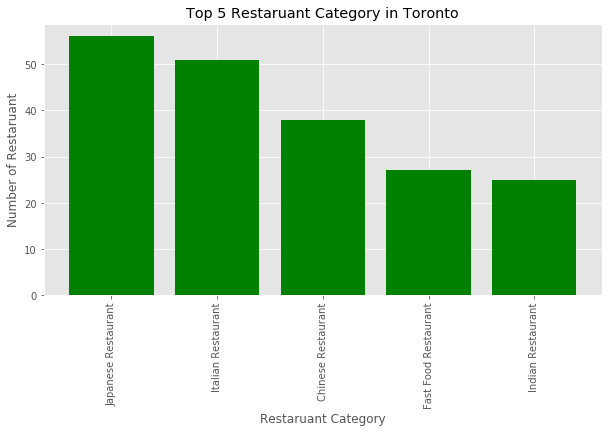

In [207]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(Toronto_restaurant_category_count_5['Venue Category'][0:5],Toronto_restaurant_category_count_5['count'][0:5], color='green')
plt.xlabel("Restaruant Category")
plt.ylabel("Number of Restaruant")
plt.title("Top 5 Restaruant Category in Toronto")
plt.xticks(rotation=90)
plt.show()

#### 4.Get percentage of each type of resteraunt per neighbourhood

In [34]:
Toronto_restaurant_onehot = pd.get_dummies(Toronto_restaurant[['Venue Category']], prefix="", prefix_sep="")

Toronto_restaurant_onehot['Neighbourhood']=Toronto_restaurant['Neighbourhood']
fixed_columns = [Toronto_restaurant_onehot.columns[-1]] + Toronto_restaurant_onehot.columns[:-1].tolist()
Toronto_restaurant_onehot = Toronto_restaurant_onehot[fixed_columns]
Toronto_restaurant_onehot.head()

,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
9,Yonge-Eglinton,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
12,Yonge-Eglinton,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
20,Yonge-Eglinton,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28,Yonge-Eglinton,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,Yonge-Eglinton,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
#Toronto_neibourhood_economic.drop(columns='Neighbourhood Id',inplace=True)
Toronto_restaurant_grouped=Toronto_restaurant_onehot.groupby('Neighbourhood').mean().reset_index()
print('Toronto_restaurant_grouped data shape',Toronto_restaurant_grouped.shape)
Toronto_restaurant_grouped.head()

Toronto_restaurant_grouped data shape (42, 28)


,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Agincourt North,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.000000,0.166667,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.166667
1,Agincourt South-Malvern West,0.083333,0.0,0.000000,0.666667,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.083333,0.000000,0.000000,0.000000,0.0,0.083333,0.083333,0.0,0.000000,0.0,0.0,0.000000
2,Annex,0.200000,0.2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.2,0.0,0.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.000000
3,Bay Street Corridor,0.047619,0.0,0.047619,0.047619,0.000000,0.0,0.0,0.047619,0.095238,0.0,0.0,0.047619,0.142857,0.142857,0.0,0.047619,0.047619,0.047619,0.047619,0.0,0.047619,0.047619,0.0,0.047619,0.0,0.0,0.047619
4,Bedford Park-Nortown,0.111111,0.0,0.000000,0.000000,0.111111,0.0,0.0,0.000000,0.111111,0.0,0.0,0.000000,0.333333,0.111111,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.111111,0.000000,0.0,0.111111,0.0,0.0,0.000000


#### 5. Visualize the distribution of all restaurants in blue and Chinese resteraunt in orange in Toronto

In [55]:
latitude = 43.6532
longitude = -79.3832
print('The geograpical coordinate of Toranto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toranto are 43.6532, -79.3832.


In [241]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the Conrad Hotel
folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Conrad Hotel',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
    ).add_to(venues_map)

# add restaurants as blue circle markers
for lat, lng, label in zip(Toronto_restaurant['Venue Latitude'], Toronto_restaurant['Venue Longitude'], Toronto_restaurant['Venue Category']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)


# add chinese restaurants as green circle markers
for lat, lng, label in zip(Toronto_restaurant[Toronto_restaurant['Venue Category']=='Chinese Restaurant']['Venue Latitude'], Toronto_restaurant[Toronto_restaurant['Venue Category']=='Chinese Restaurant']['Venue Longitude'], Toronto_restaurant['Venue Category']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        popup=label,
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map)    
    
    
    
# display map
venues_map

#### Merge Toronto demographic, economic, resteraunt data together

In [44]:
Toronto_restaurant_final=pd.merge(Toronto_restaurant_grouped,Toronto_restaurant_per_neighborhood,on='Neighbourhood')
Toronto_restaurant_final['Neighbourhood']=Toronto_restaurant_final['Neighbourhood'].str.strip()
Toronto_restaurant_final=pd.merge(Toronto_restaurant_final,Toronto_economic,left_on='Neighbourhood',right_on='Neighbourhood',how='inner')
Toronto_restaurant_final=pd.merge(Toronto_restaurant_final,Toronto_ethnic,left_on='Neighbourhood',right_on='Neighbourhood')
Toronto_restaurant_final=pd.merge(Toronto_restaurant_final,Toronto_population,on='Neighbourhood')
Toronto_restaurant_final=pd.merge(Toronto_restaurant_final,Toronto_income,on='Neighbourhood')
#Toronto_restaurant_final.drop(columns=['Neighbourhood','Neighbourhood'],inplace=True)
#Toronto_restaurant_final.dtypes
Toronto_restaurant_final.columns.values
#Toronto_restaurant_final.shape

array(['Neighbourhood', 'American Restaurant', 'Asian Restaurant',
       'Caribbean Restaurant', 'Chinese Restaurant',
       'Comfort Food Restaurant', 'Eastern European Restaurant',
       'Ethiopian Restaurant', 'Falafel Restaurant',
       'Fast Food Restaurant', 'French Restaurant', 'Greek Restaurant',
       'Indian Restaurant', 'Italian Restaurant', 'Japanese Restaurant',
       'Korean Restaurant', 'Mediterranean Restaurant',
       'Mexican Restaurant', 'Middle Eastern Restaurant',
       'Modern European Restaurant', 'Pakistani Restaurant', 'Restaurant',
       'Seafood Restaurant', 'Tapas Restaurant', 'Thai Restaurant',
       'Tibetan Restaurant', 'Vegetarian / Vegan Restaurant',
       'Vietnamese Restaurant', 'total restaurant count',
       'total venue count', 'restaurant percentage', 'Businesses',
       'Child Care Spaces', 'Debt Risk Score', 'Home Prices',
       'Local Employment', 'Social Assistance Recipients',
       ' African origins', ' Asian origins', ' Bangl

#### Check correlation between resteraunt with other variables

In [45]:
corr = Toronto_restaurant_final.corr()
corr

,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000"
American Restaurant,1.000000,-0.004107,-0.154599,0.110119,-0.045483,0.569715,0.411954,-0.087220,-0.251381,0.130883,-0.005374,0.005040,-0.246465,-0.270873,-0.171782,0.010575,-0.042143,-0.109207,0.045979,-0.151625,-0.184258,0.016643,0.053128,0.206321,0.070997,0.083057,-0.265344,-0.054455,-0.061840,-0.053231,0.105516,-0.005549,0.148982,0.127027,0.008806,0.088504,NaN,-0.068990,NaN,0.105374,NaN,NaN,0.013998,-0.125173,-0.052057,0.235477,0.207128,0.027996,NaN,0.108103,-0.120537,-0.048539,NaN,-0.087338,-0.154432,-0.079848,-0.053399,-0.198945,NaN,NaN,0.122955,0.096503,0.035266,-0.034006,-0.087338,-0.087338,NaN,-0.087338,NaN,-0.087338,-0.089369,0.021051,-0.135516,-0.097656,-0.087338,0.077453
Asian Restaurant,-0.004107,1.000000,0.062924,-0.204782,0.282327,-0.029881,-0.081632,-0.148283,-0.140175,0.486307,-0.168073,0.183908,-0.024675,-0.028099,-0.143363,-0.125358,-0.115963,-0.157342,-0.128273,-0.046266,0.227241,-0.053966,-0.123760,-0.236092,0.168643,0.113572,-0.140009,-0.127335,-0.020658,-0.163784,-0.024776,0.390889,0.069706,0.187146,-0.109081,-0.120917,NaN,-0.204046,NaN,0.165258,NaN,NaN,-0.193816,0.096710,-0.159687,0.091146,0.093629,0.191659,NaN,0.044334,-0.100595,0.017288,NaN,-0.072889,-0.034890,-0.023631,-0.079535,0.074554,NaN,NaN,0.198745,-0.091799,0.265618,-0.008599,-0.072889,0.099871,NaN,-0.072889,NaN,-0.072889,-0.250071,-0.228203,-0.283425,0.216579,0.272631,-0.011488
Caribbean Restaurant,-0.154599,0.062924,1.000000,-0.141501,-0.079722,-0.069495,-0.045187,0.168320,0.378936,-0.118473,-0.115378,0.202079,-0.178505,-0.012028,-0.107986,-0.039161,-0.080310,-0.009772,0.052941,0.234916,-0.248329,-0.080100,-0.059040,-0.040479,-0.073522,-0.069208,-0.135357,0.021835,-0.028409,0.225661,0.014554,-0.206357,-0.186306,-0.140834,0.088056,0.073628,NaN,0.179920,NaN,-0.250441,NaN,NaN,-0.087411,0.806381,-0.078295,-0.177605,-0.137058,-0.191977,NaN,-0.143634,-0.075772,0.065191,NaN,-0.054902,-0.097079,-0.128873,0.493121,-0.020507,NaN,NaN,-0.143698,-0.105418,-0.174694,-0.097699,-0.054902,-0.054902,NaN,0.394223,NaN,-0.054902,0.177227,0.179185,0.146214,0.080708,-0.054902,0.083030
Chinese Restaurant,0.110119,-0.204782,-0.141501,1.000000,-0.027195,-0.081938,-0.095276,-0.166354,-0.059750,-0.142999,-0.172641,-0.065826,-0.301825,-0.235667,0.131832,0.269152,-0.101486,-0.111098,-0.048524,-0.055665,-0.218962,0.056834,0.023344,-0.194705,-0.004040,-0.038234,0.084324,0.034301,-0.176292,0.361741,-0.028317,0.016694,0.181173,-0.321590,-0.022401,0.250359,NaN,0.7

In [69]:
import re
restaurant_corr=corr['total restaurant count'].sort_values(ascending=False)[abs(corr['total restaurant count'].sort_values(ascending=False))>0.1]
restaurant_corr=restaurant_corr.reset_index()
restaurant_corr.columns=(['variable','corr'])
restaurant_corr=restaurant_corr[['Restaurant' not in x for x in restaurant_corr['variable']]]
restaurant_corr['abs_corr']=abs(restaurant_corr['corr'])
restaurant_corr.sort_values(by=['abs_corr'],ascending=False, inplace=True)
restaurant_corr[['variable','corr']].to_csv(r'D:\Yafen\study\IBM data science course on Coursera\Capstone\restaruant correlation.csv')


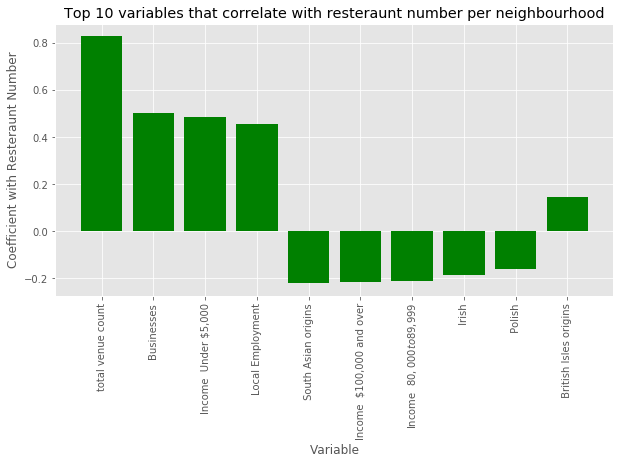

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(restaurant_corr['variable'][1:11],restaurant_corr['corr'][1:11], color='green')
plt.xlabel("Variable")
plt.ylabel("Coefficient with Resteraunt Number")
plt.title("Top 10 variables that correlate with resteraunt number per neighbourhood")
plt.xticks(rotation=90)
plt.show()

In [71]:
Toronto_restaurant_final_2=Toronto_restaurant_final[Toronto_restaurant_final['Chinese Restaurant']>0].sort_values('Chinese Restaurant',ascending=False)

corr_2=Toronto_restaurant_final_2.corr()

#### Check correlation between Chinese restaurant with other variables

In [78]:
chinese_corr=corr_2['Chinese Restaurant'].sort_values(ascending=False)[abs(corr['Chinese Restaurant'].sort_values(ascending=False))>0.1]
chinese_corr=chinese_corr.reset_index()
chinese_corr.columns=(['variable','corr'])
chinese_corr['abs_corr']=abs(chinese_corr['corr'])
chinese_corr.sort_values(by=['abs_corr'],ascending=False, inplace=True)
chinese_corr[['variable','corr']].to_csv(r'D:\Yafen\study\IBM data science course on Coursera\Capstone\Chinese restaruant correlation.csv')

### visualize the correlation between Chinese restaurant with other variables	 

In [83]:
chinese_corr_1=chinese_corr[1:11]
chinese_corr_1.sort_values(by='corr',ascending=False,inplace=True)

C:\Users\yafen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


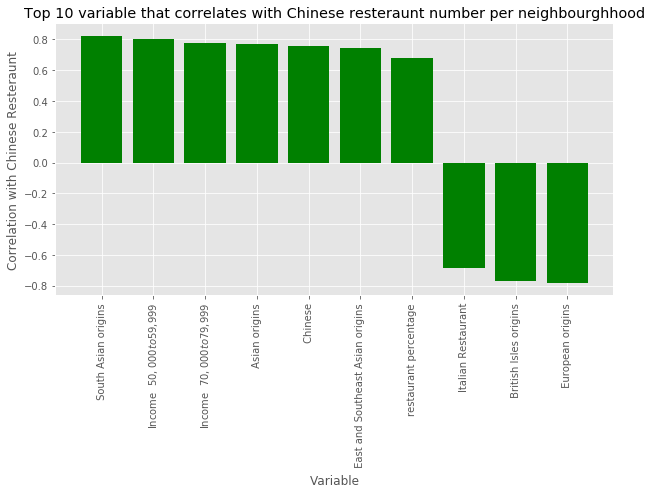

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.bar(chinese_corr_1['variable'],chinese_corr_1['corr'], color='green')
plt.xlabel("Variable")
plt.ylabel("Correlation with Chinese Resteraunt")
plt.title("Top 10 variable that correlates with Chinese resteraunt number per neighbourghhood")
plt.xticks(rotation=90)
plt.show()

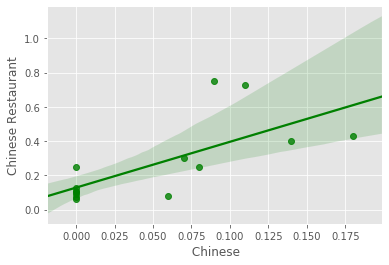

In [195]:
import seaborn as sns
sns.regplot(x=" Chinese", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

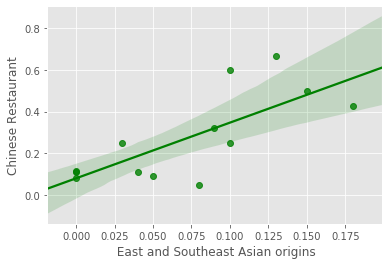

In [87]:
import seaborn as sns
sns.regplot(x=" East and Southeast Asian origins", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

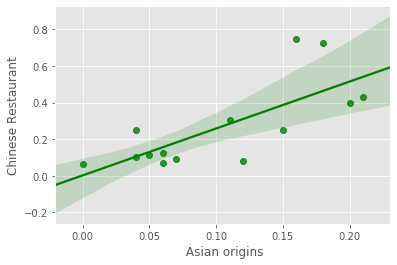

In [197]:
import seaborn as sns
sns.regplot(x=" Asian origins", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

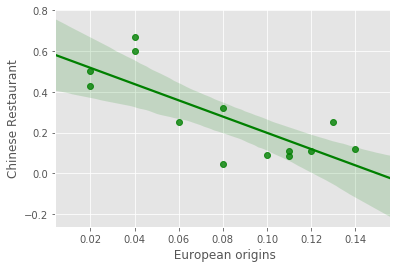

In [85]:
import seaborn as sns
sns.regplot(x=" European origins", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

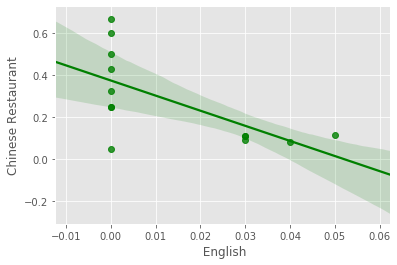

In [88]:
import seaborn as sns
sns.regplot(x=" English", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

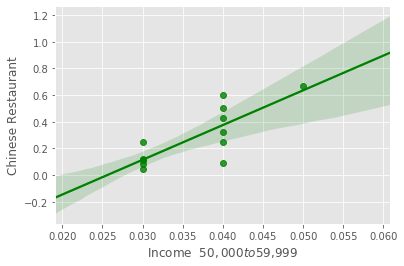

In [90]:
import seaborn as sns
sns.regplot(x="Income  $50,000 to $59,999", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

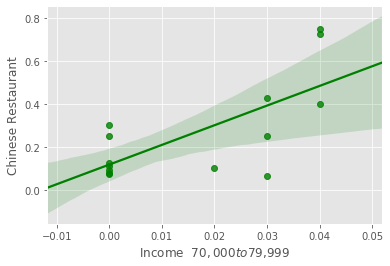

In [204]:
import seaborn as sns
sns.regplot(x="Income  $70,000 to $79,999", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

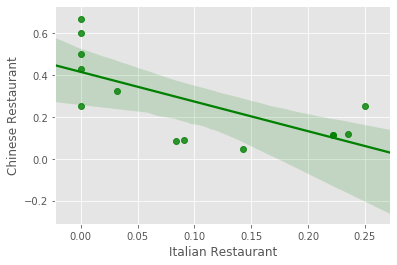

In [94]:
import seaborn as sns
sns.regplot(x="Italian Restaurant", y="Chinese Restaurant", data=Toronto_restaurant_final_2,color='green');

## Modeling: <a name="modeling"></a>

### K mean clustering of neighourhood

In [100]:
Toronto_restaurant_final_clustering=Toronto_restaurant_final_2.drop(columns='Neighbourhood')
Toronto_restaurant_final_clustering.head()

,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Population, 2016",Total private dwellings,Population density per square kilometre,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000"
1,0.083333,0.0,0.000000,0.666667,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.083333,0.000000,0.0,0.0,0.0,0.083333,0.083333,0.000000,0.000000,0.0,0.00000,0.000000,14,18,0.78,1378,135,756,332710,18329,1542,0.0,0.18,0.0,0.00,0.0,0.0,0.11,0.0,0.13,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,23757,8535,3034,0.0,0.00,0.12,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.05,0.04,0.04,0.03,0.0,0.00
15,0.200000,0.0,0.000000,0.600000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,5,14,0.36,443,126,758,355438,4734,3848,0.0,0.16,0.0,0.00,0.0,0.0,0.09,0.0,0.10,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,43993,15486,6144,0.0,0.00,0.12,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.04,0.03,0.0,0.00
0,0.000000,0.0,0.000000,0.500000,0.000000,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.166667,6,18,0.33,353,130,765,375307,7449,1930,0.0,0.20,0.0,0.00,0.0,0.0,0.14,0.0,0.15,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,29113,9371,3929,0.0,0.00,0.14,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.04,0.00,0.0,0.00
29,0.000000,0.0,0.000000,0.428571,0.000000,0.0,0.0,0.0,0.142857,0.0,0.0,0.0,0.000000,0.142857,0.142857,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.142857,7,12,0.58,237,105,778,440688,5835,1549,0.0,0.21,0.0,0.00,0.0,0.0,0.18,0.0,0.18,0.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,24623,8032,5436,0.0,0.00,0.14,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.04,0.03,0.03,0.0,0.00
14,0.000000,0.0,0.032258,0.322581,0.064516,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.032258,0.064516,0.000000,0.000000,0.096774,0.0,0.0,0.0,0.032258,0.000000,0.032258,0.032258,0.0,0.16129,0.129032,32,93,0.34,1883,247,728,477989,37205,2523,0.0,0.11,0.0,0.05,0.0,0.0,0.07,0.0,0.09,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,17945,9745,11806,0.0,0.03,0.10,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.04,0.03,0.00,0.00,0.0,0.03


In [101]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_restaurant_final_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([1, 1, 1, 4, 4, 2, 1, 2, 4, 0, 4, 4, 3])

In [145]:
Toronto_restaurant_final_2['cluster']=list(kmeans.labels_)
Toronto_restaurant_final_2

,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Population, 2016",Total private dwellings,Population density per square kilometre,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000",cluster
1,Agincourt South-Malvern West,0.083333,0.000000,0.000000,0.666667,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.00000,0.000000,14,18,0.78,1378,135,756,332710,18329,1542,0.0,0.18,0.0,0.00,0.0,0.0,0.11,0.0,0.13,0.00,0.00,0.04,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.04,0.0,0.0,0.0,23757,8535,3034,0.00,0.00,0.12,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.05,0.04,0.04,0.03,0.0,0.00,1
15,L'Amoreaux,0.200000,0.000000,0.000000,0.600000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,5,14,0.36,443,126,758,355438,4734,3848,0.0,0.16,0.0,0.00,0.0,0.0,0.09,0.0,0.10,0.00,0.00,0.04,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.04,0.0,0.0,0.0,43993,15486,6144,0.00,0.00,0.12,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.04,0.04,0.04,0.03,0.0,0.00,1
0,Agincourt North,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.166667,6,18,0.33,353,130,765,375307,7449,1930,0.0,0.20,0.0,0.00,0.0,0.0,0.14,0.0,0.15,0.00,0.00,0.02,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.04,0.0,0.0,0.0,29113,9371,3929,0.00,0.00,0.14,0.00,0.03,0.0,0.0,0.0,0.0,0.00,0.04,0.04,0.04,0.00,0.0,0.00,1
29,Steeles,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.0,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.142857,7,12,0.58,237,105,778,440688,5835,1549,0.0,0.21,0.0,0.00,0.0,0.0,0.18,0.0,0.18,0.00,0.00,0.02,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.02,0.0,0.0,0.0,24623,8032,5436,0.00,0.00,0.14,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.04,0.04,0.03,0.03,0.0,0.00,4
14,Kensington-Chinatown,0.000000,0.000000,0.032258,0.322581,0.064516,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.032258,0.064516,0.000000,0.000000,0.096774,0.000000,0.000000,0.000000,0.032258,0.000000,0.032258,0.032258,0.000000,0.16129,0.129032,32,93,0.34,1883,247,728,477989,37205,2523,0.0,0.11,0.0,0.05,0.0,0.0,0.07,0.0,0.09,0.00,0.00,0.08,0.0,0.0,0.0,

In [149]:
column=chinese_corr.variable.to_list()
#column.append('Neighbourhood')

In [151]:
Toronto_restaurant_final_2.groupby('cluster').mean().sort_values('Chinese Restaurant',ascending=False)[column]

,Chinese Restaurant,South Asian origins,"Income $50,000 to $59,999",European origins,"Income $70,000 to $79,999",British Isles origins,Asian origins,Chinese,East and Southeast Asian origins,Italian Restaurant,restaurant percentage,English,"Income $60,000 to $69,999","Income $200,000 and over","Income $80,000 to $89,999",total venue count,Home Prices,Debt Risk Score,American Restaurant,Asian Restaurant,Other North American origins,Restaurant,Mediterranean Restaurant,Falafel Restaurant,"Income $25,000 to $29,999","Income $20,000 to $24,999",Mexican Restaurant,Caribbean Restaurant,Thai Restaurant,Greek Restaurant,French Restaurant,Scottish,Japanese Restaurant,Social Assistance Recipients,"Income $100,000 and over",Eastern European origins,Middle Eastern Restaurant,Korean Restaurant,Polish,East Indian,Irish,Italian,Portuguese,Southern European origins
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.504167,0.040,0.0425,0.040,0.0375,0.000,0.1725,0.105,0.120,0.062500,0.435,0.000,0.040,0.000,0.0225,16.25,368649.5,758.75,0.070833,0.000000,0.000,0.020833,0.020833,0.000000,0.0075,0.000,0.000000,0.000000,0.062500,0.000000,0.000000,0.00,0.041667,2323.25,0.125,0.000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
4,0.207301,0.004,0.0360,0.084,0.0060,0.052,0.1000,0.050,0.064,0.085745,0.378,0.020,0.026,0.014,0.0120,42.60,473435.0,729.60,0.018182,0.034848,0.014,0.042815,0.000000,0.000000,0.0000,0.006,0.041577,0.006452,0.050896,0.022222,0.000000,0.00,0.041475,2763.40,0.122,0.000,0.000000,0.028571,0.00,0.0,0.0,0.0,0.0,0.0
2,0.183824,0.000,0.0300,0.135,0.0300,0.040,0.0250,0.000,0.015,0.117647,0.275,0.025,0.030,0.090,0.0000,36.00,976652.0,760.00,0.029412,0.000000,0.000,0.058824,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.272059,458.00,0.180,0.055,0.125000,0.125000,0.02,0.0,0.0,0.0,0.0,0.0
0,0.111111,0.000,0.0300,0.120,0.0000,0.070,0.0600,0.000,0.040,0.222222,0.220,0.030,0.030,0.050,0.0000,40.00,773920.0,748.00,0.000000,0.000000,0.000,0.222222,0.000000,0.000000,0.0000,0.000,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.222222,259.00,0.150,0.000,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
3,0.047619,0.000,0.0300,0.080,0.0000,0.040,0.1200,0.060,0.080,0.142857,0.240,0.000,0.030,0.040,0.0000,92.00,457787.0,755.00,0.047619,0.000000,0.000,0.047619,0.047619,0.047619,0.0000,0.000,0.047619,0.047619,0.047619,0.000000,0.000000,0.00,0.142857,678.00,0.120,0.000,0.047619,0.000000,0.00,0.0,0.0,0.0,0.0,0.0


In [244]:
column_2=['cluster','Neighbourhood','Chinese Restaurant']
column_3=column_2+(chinese_corr.variable.to_list())
column_3

['cluster',
 'Neighbourhood',
 'Chinese Restaurant',
 'Chinese Restaurant',
 ' South Asian origins',
 'Income  $50,000 to $59,999',
 ' European origins',
 'Income  $70,000 to $79,999',
 ' British Isles origins',
 ' Asian origins',
 ' Chinese',
 ' East and Southeast Asian origins',
 'Italian Restaurant',
 'restaurant percentage',
 ' English',
 'Income  $60,000 to $69,999',
 'Income    $200,000 and over',
 'Income  $80,000 to $89,999',
 'total venue count',
 'Home Prices',
 'Debt Risk Score',
 'American Restaurant',
 'Asian Restaurant',
 ' Other North American origins',
 'Restaurant',
 'Mediterranean Restaurant',
 'Falafel Restaurant',
 'Income  $25,000 to $29,999',
 'Income  $20,000 to $24,999',
 'Mexican Restaurant',
 'Caribbean Restaurant',
 'Thai Restaurant',
 'Greek Restaurant',
 'French Restaurant',
 ' Scottish',
 'Japanese Restaurant',
 'Social Assistance Recipients',
 'Income  $100,000 and over',
 ' Eastern European origins',
 'Middle Eastern Restaurant',
 'Korean Restaurant',
 '

In [245]:
Toronto_restaurant_final_2[column_3].sort_values('cluster')

,cluster,Neighbourhood,Chinese Restaurant,Chinese Restaurant,South Asian origins,"Income $50,000 to $59,999",European origins,"Income $70,000 to $79,999",British Isles origins,Asian origins,Chinese,East and Southeast Asian origins,Italian Restaurant,restaurant percentage,English,"Income $60,000 to $69,999","Income $200,000 and over","Income $80,000 to $89,999",total venue count,Home Prices,Debt Risk Score,American Restaurant,Asian Restaurant,Other North American origins,Restaurant,Mediterranean Restaurant,Falafel Restaurant,"Income $25,000 to $29,999","Income $20,000 to $24,999",Mexican Restaurant,Caribbean Restaurant,Thai Restaurant,Greek Restaurant,French Restaurant,Scottish,Japanese Restaurant,Social Assistance Recipients,"Income $100,000 and over",Eastern European origins,Middle Eastern Restaurant,Korean Restaurant,Polish,East Indian,Irish,Italian,Portuguese,Southern European origins
34,0,University,0.111111,0.111111,0.00,0.03,0.12,0.00,0.07,0.06,0.00,0.04,0.222222,0.22,0.03,0.03,0.05,0.00,40,773920,748,0.000000,0.000000,0.00,0.222222,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.111111,0.00,0.222222,259,0.15,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
1,1,Agincourt South-Malvern West,0.666667,0.666667,0.04,0.05,0.04,0.04,0.00,0.18,0.11,0.13,0.000000,0.78,0.00,0.04,0.00,0.03,18,332710,756,0.083333,0.000000,0.00,0.083333,0.083333,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1542,0.12,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
15,1,L'Amoreaux,0.600000,0.600000,0.04,0.04,0.04,0.04,0.00,0.16,0.09,0.10,0.000000,0.36,0.00,0.04,0.00,0.03,14,355438,758,0.200000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,3848,0.12,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
0,1,Agincourt North,0.500000,0.500000,0.04,0.04,0.02,0.04,0.00,0.20,0.14,0.15,0.000000,0.33,0.00,0.04,0.00,0.00,18,375307,765,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.03,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.166667,1930,0.14,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
30,1,Tam O'Shanter-Sullivan,0.250000,0.250000,0.04,0.04,0.06,0.03,0.00,0.15,0.08,0.10,0.250000,0.27,0.00,0.04,0.00,0.03,15,411143,756,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.250000,0.000000,0.000000,0.00,0.000000,1973,0.12,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
10,2,Forest Hill North,0.250000,0.250000,0.00,0.03,0.13,0.03,0.00,0.05,0.00,0.03,0.000000,0.22,0.00,0.03,0.09,0.00,18,957688,749,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.250000,633,0.17,0.07,0.250000,0.250000,0.04,0.0,0.0,0.0,0.0,0.0
37,2,Yonge-St.Clair,0.117647,0.117647,0.00,0.03,0.14,0.03,0.08,0.00,0.00,0.00,0.235294,0.33,0.05,0.03,0.09,0.00,54,995616,771,0.058824,0.000000,0.00,0.117647,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.04,0.294118,283,0.19,0.04,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
3,3,Bay Street Corridor,0.047619,0.047619,0.00,0.03,0.08,0.00,0.04,0.12,0.06,0.08,0.142857,0.24,0.00,0.03,0.04,0.00,92,457787,755,0.047619,0.000000,0.00,0.047619,0.047619,0.047619,0.00,0.00,0.047619,0.047619,0.047619,0.000000,0.000000,0.00,0.142857,678,0.12,0.00,0.047619,0.000000,0.00,0.0,0.0,0.0,0.0,0.0
29,4,Steeles,0.428571,0.428571,0.02,0.04,0.02,0.03,0.00,0.21,0.18,0.18,0.000000,0.58,0.00,0.04,0.00,0.03,12,440688,778,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.142857,1549,0.14,0.00,0.000000,0.142857,0.00,0.0,0.0,0.0,0.0,0.0
14,4,Kensington-Chinatown,0.322581,0.322581,0.00,0.04,0.08,0.00,0.05,0.11,0.07,0.09,0.032258,0.34,0.00,0.03,0.00,0.00,93,477989,728,0.000000,0.000000,0.00,0.032258,0.000000,0.000000,0.00,0.00,0.096774,0.032258,0.032258,0.000000,0.000000,0.00,0.064516,2523,0.10,0.00,0.000000,0.000000,0.00,0.0,0.0,0.0,0.0,0.0


In [247]:
Toronto_restaurant_final_2[column_3].sort_values('cluster').to_csv(r'D:\Yafen\study\IBM data science course on Coursera\Capstone\neighhourhood with cluster.csv')

### Cluster 0

In [148]:
Toronto_restaurant_final_2[Toronto_restaurant_final_2['cluster']==0]

,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Population, 2016",Total private dwellings,Population density per square kilometre,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000",cluster
34,University,0.0,0.0,0.0,0.111111,0.111111,0.0,0.0,0.0,0.0,0.111111,0.0,0.0,0.222222,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0,0.0,0.0,0.0,9,40,0.22,483,15,748,773920,10967,259,0.0,0.06,0.0,0.07,0.0,0.0,0.0,0.0,0.04,0.0,0.03,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7607,3826,5395,0.05,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.0,0.0,0.0,0.03,0


### Cluster 1

In [160]:
column_2=chinese_corr.variable.to_list()
column_2.append('Neighbourhood')

In [161]:
Toronto_restaurant_final_2[Toronto_restaurant_final_2['cluster']==1][column_2]

,Chinese Restaurant,South Asian origins,"Income $50,000 to $59,999",European origins,"Income $70,000 to $79,999",British Isles origins,Asian origins,Chinese,East and Southeast Asian origins,Italian Restaurant,restaurant percentage,English,"Income $60,000 to $69,999","Income $200,000 and over","Income $80,000 to $89,999",total venue count,Home Prices,Debt Risk Score,American Restaurant,Asian Restaurant,Other North American origins,Restaurant,Mediterranean Restaurant,Falafel Restaurant,"Income $25,000 to $29,999","Income $20,000 to $24,999",Mexican Restaurant,Caribbean Restaurant,Thai Restaurant,Greek Restaurant,French Restaurant,Scottish,Japanese Restaurant,Social Assistance Recipients,"Income $100,000 and over",Eastern European origins,Middle Eastern Restaurant,Korean Restaurant,Polish,East Indian,Irish,Italian,Portuguese,Southern European origins,Neighbourhood
1,0.666667,0.04,0.05,0.04,0.04,0.0,0.18,0.11,0.13,0.00,0.78,0.0,0.04,0.0,0.03,18,332710,756,0.083333,0.0,0.0,0.083333,0.083333,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,1542,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Agincourt South-Malvern West
15,0.600000,0.04,0.04,0.04,0.04,0.0,0.16,0.09,0.10,0.00,0.36,0.0,0.04,0.0,0.03,14,355438,758,0.200000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,3848,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,L'Amoreaux
0,0.500000,0.04,0.04,0.02,0.04,0.0,0.20,0.14,0.15,0.00,0.33,0.0,0.04,0.0,0.00,18,375307,765,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.03,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.166667,1930,0.14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Agincourt North
30,0.250000,0.04,0.04,0.06,0.03,0.0,0.15,0.08,0.10,0.25,0.27,0.0,0.04,0.0,0.03,15,411143,756,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.000000,1973,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tam O'Shanter-Sullivan


### Cluster 2

In [128]:
Toronto_restaurant_final_2[Toronto_restaurant_final_2['cluster']==2]

,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Population, 2016",Total private dwellings,Population density per square kilometre,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000",cluster
10,Forest Hill North,0.000000,0.0,0.0,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.250000,0.25,0.0,0.0,0.25,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,4,18,0.22,144,110,749,957688,897,633,0.0,0.05,0.0,0.00,0.0,0.0,0.0,0.0,0.03,0.07,0.00,0.13,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.00,0.0,0.0,0.0,0.0,12806,5784,8054,0.09,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.03,0.0,0.0,0.0,2
37,Yonge-St.Clair,0.058824,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.294118,0.00,0.0,0.0,0.00,0.058824,0.0,0.117647,0.0,0.058824,0.0,0.0,0.0,0.058824,18,54,0.33,468,20,771,995616,7858,283,0.0,0.00,0.0,0.08,0.0,0.0,0.0,0.0,0.00,0.04,0.05,0.14,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,0.0,0.0,12528,7475,10708,0.09,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.03,0.0,0.0,0.0,2


### Cluster 3

In [129]:
Toronto_restaurant_final_2[Toronto_restaurant_final_2['cluster']==3]

,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Population, 2016",Total private dwellings,Population density per square kilometre,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000",cluster
3,Bay Street Corridor,0.047619,0.0,0.047619,0.047619,0.0,0.0,0.0,0.047619,0.095238,0.0,0.0,0.047619,0.142857,0.142857,0.0,0.047619,0.047619,0.047619,0.047619,0.0,0.047619,0.047619,0.0,0.047619,0.0,0.0,0.047619,22,92,0.24,4324,30,755,457787,185891,678,0.0,0.12,0.0,0.04,0.0,0.0,0.06,0.0,0.08,0.0,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25797,18436,14097,0.04,0.0,0.12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.0,0.0,0.0,0.08,3


### Cluster 4

In [130]:
Toronto_restaurant_final_2[Toronto_restaurant_final_2['cluster']==4]

,Neighbourhood,American Restaurant,Asian Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Greek Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Restaurant,Seafood Restaurant,Tapas Restaurant,Thai Restaurant,Tibetan Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,total restaurant count,total venue count,restaurant percentage,Businesses,Child Care Spaces,Debt Risk Score,Home Prices,Local Employment,Social Assistance Recipients,African origins,Asian origins,Bangladeshi,British Isles origins,Canadian,Caribbean origins,Chinese,East Indian,East and Southeast Asian origins,Eastern European origins,English,European origins,Filipino,Irish,Italian,Other North American origins,Pakistani,Polish,Portuguese,Scottish,South Asian origins,Southern European origins,Sri Lankan,West Central Asian and Middle Eastern origins,"Population, 2016",Total private dwellings,Population density per square kilometre,"Income $200,000 and over","Income $10,000 to $14,999","Income $100,000 and over","Income $20,000 to $24,999","Income $25,000 to $29,999","Income $30,000 to $34,999","Income $35,000 to $39,999","Income $40,000 to $44,999","Income $45,000 to $49,999","Income $5,000 to $9,999","Income $50,000 to $59,999","Income $60,000 to $69,999","Income $70,000 to $79,999","Income $80,000 to $89,999","Income $90,000 to $99,999","Income Under $5,000",cluster
29,Steeles,0.000000,0.000000,0.000000,0.428571,0.000000,0.000000,0.0,0.0,0.142857,0.0,0.000000,0.000000,0.000000,0.142857,0.142857,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.142857,7,12,0.58,237,105,778,440688,5835,1549,0.0,0.21,0.0,0.00,0.0,0.0,0.18,0.0,0.18,0.0,0.00,0.02,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.02,0.0,0.0,0.0,24623,8032,5436,0.00,0.00,0.14,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.04,0.04,0.03,0.03,0.0,0.00,4
14,Kensington-Chinatown,0.000000,0.000000,0.032258,0.322581,0.064516,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.032258,0.064516,0.000000,0.0,0.096774,0.0,0.0,0.000000,0.032258,0.0,0.032258,0.032258,0.000000,0.16129,0.129032,32,93,0.34,1883,247,728,477989,37205,2523,0.0,0.11,0.0,0.05,0.0,0.0,0.07,0.0,0.09,0.0,0.00,0.08,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,17945,9745,11806,0.00,0.03,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.04,0.03,0.00,0.00,0.0,0.03,4
19,Moss Park,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.111111,0.111111,0.222222,0.000000,0.000000,0.0,0.111111,0.0,0.0,0.111111,0.000000,0.0,0.000000,0.222222,0.000000,0.00000,0.000000,10,36,0.28,841,110,709,457524,12051,3510,0.0,0.05,0.0,0.07,0.0,0.0,0.00,0.0,0.00,0.0,0.03,0.11,0.0,0.0,0.0,0.03,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,20506,12513,14753,0.03,0.05,0.13,0.00,0.0,0.0,0.0,0.0,0.0,0.03,0.03,0.00,0.00,0.00,0.0,0.00,4
28,South Parkdale,0.090909,0.090909,0.000000,0.090909,0.000000,0.090909,0.0,0.0,0.090909,0.0,0.000000,0.090909,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.181818,0.0,0.000000,0.000000,0.181818,0.00000,0.000000,12,35,0.34,564,70,695,500054,7617,4473,0.0,0.07,0.0,0.06,0.0,0.0,0.00,0.0,0.05,0.0,0.03,0.10,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,21849,12085,9583,0.00,0.04,0.07,0.03,0.0,0.0,0.0,0.0,0.0,0.00,0.04,0.03,0.00,0.00,0.0,0.00,4
11,Greenwood-Coxwell,0.000000,0.083333,0.000000,0.083333,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.583333,0.083333,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.083333,0.000000,0.0,0.000000,0.000000,0.083333,0.00000,0.000000,13,37,0.35,315,94,738,490920,2342,1762,0.0,0.06,0.0,0.08,0.0,0.0,0.00,0.0,0.00,0.0,0.04,0.11,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,14417,6443,8582,0.04,0.00,0.17,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.03,0.03,0.00,0.03,0.0,0.00,4


In [114]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [115]:
Toronto_restaurant_final_3=pd.merge(Toronto_restaurant_final_2,Toronto_geo,left_on='Neighbourhood',right_on='Neighbourhood')
#Toronto_restaurant_final_2

In [243]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_restaurant_final_3['Latitude'], Toronto_restaurant_final_3['Longitude'], Toronto_restaurant_final_3['Neighbourhood'], Toronto_restaurant_final_3['cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

cluster 0: red
cluster 1: purple
clulster 2: blue
cluster 3: light green
cluster 4: orange

## Result and Discussion: <a name="results"></a>

The city of Toronto has overall 397 restaurants. The most popular ethnic cuisines are Japanese, Italian, Chinese, fast food and Indian. There are 38 Chinese restaurants in total and distributed in 14 different neighborhoods. When looking at social factors that correlate with Chinese restaurant rate, the pattern and dependency are very different from restaurant rate.Chinese restaurant rate has stronger correlation with ethnic origins and certain income ranges, and other restaurants categories as shown below. The top variables on the list are mainly ethnic origins and income ranges. Chinese restaurant rate is strongly positively associated with eastern ethnic origins including ‘South Asian origins’,’ Asian origins’,’ Chinese’ and ‘East and Southeast Asian origins’ and negatively associated with western origins  ‘European origins’ ,‘English’ and ‘British Isles origins’ , suggesting that Chinese cuisine is much more popular in neighborhood with eastern ethnic origins.  Secondly, looking at income ranges that correlate with Chinese restaurant, Income  $50,000 to $59,999, $60,000 to $69,999, $70,000 to $79,999, and $80,000 to $89,999 show positive correlation, while   $200,000 and over shows negative correlation, implying that Chinese food is more popular in the middle class. 

To cluster the neighborhoods with Chinese restaurants, K mean clustering method is used.  The neighborhoods are clustered into 5 groups. Cluster 1 and 4 are two biggest clusters that contain 4 and 5 neighborhoods, while clusters 0, 2, 3 only have 1 or 2 neighborhood.  Neighborhoods in cluster 4 are geographically close with each other and located near coast area. The characteristics of each cluster could be used as guidance for the business owners to decide best location that suits their business models. For example, Cluster 1 have higher Chinese restaurant rate, people with Asian ethnic origins and home price average around 368k. Neighborhoods such as ‘Tam O'Shanter-Sullivan’, and ‘Forest Hill North’ with relatively low rate of Chinese restaurant and more Asian people may be less competitive and thus considered as good options for new Chinese restaurants. Neighborhoods in the Cluster 4 have more venues and relatively lower Chinese restaurants.  They are located in the center of city where the people visits and traffic is thriving. They could be good choice if the theme of the new Chinese restaurant is tailored to people with quick pace or tourists seeking for something special.

## Conclusion: <a name="conclusion"></a>

In this project, the distribution of Chinese restaurants and correlation with social factors in the city of Toronto was studied. Chinese restaurant is shown to be top 3 popular ethnic cuisines in the city.  Correlation analysis suggests that Chinese restaurant is strongly associated with Asian ethnic origins, people with income range representative of the middle class. Finally K mean clustering method was used to take all the features such as ethnicity, purchasing ability, housing price, competiveness within or between each restaurant categories etc. into consideration and cluster the neighborhoods with Chinese restaurant.  Therefore it can be used as guidance for choosing right location for new Chinese restaurant and fit specific business needs.     
